In [ ]:
# Instalar librerías adicionales si es necesario (ejecutar primero)
!pip install seaborn plotly

# Importaciones estándar (¡importa TensorFlow aquí!)
import tensorflow as tf  # <-- Esta línea es la clave que faltaba
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Ahora sí, verifica la GPU (después de importar tf)
print("GPU disponible:", tf.config.list_physical_devices('GPU'))

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
import plotly.express as px

print("Entorno configurado correctamente en Google Colab")


GPU disponible: []
Entorno configurado correctamente en Google Colab


# Visualización de Datos
Usamos Iris para gráficos básicos (Matplotlib), estadísticos (Seaborn) e interactivos (Plotly).

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Columnas: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


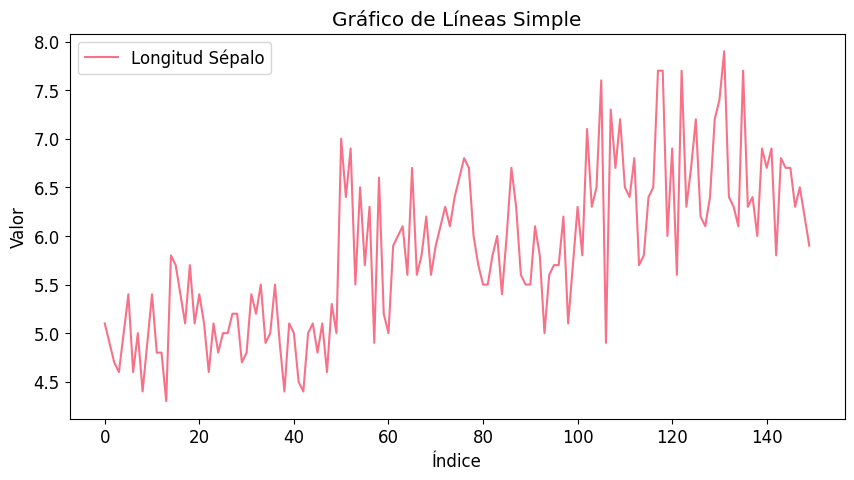

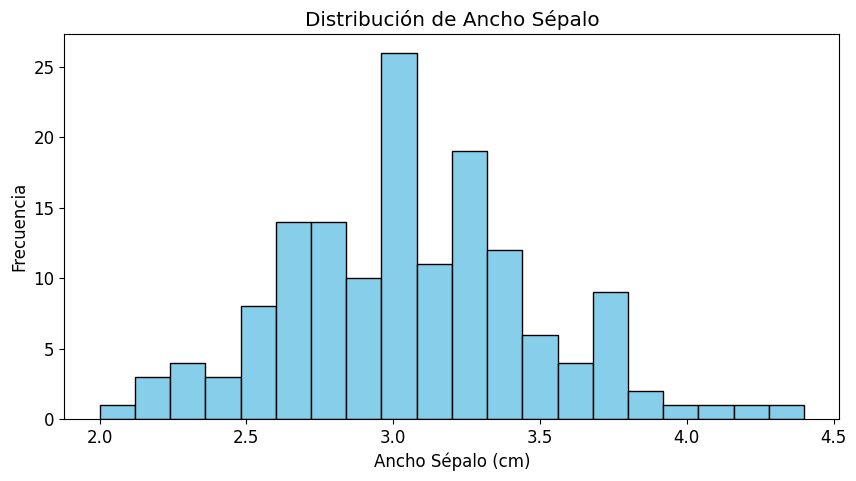

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Cargar el dataset Iris y crear el DataFrame
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Mostrar las primeras filas para verificar (opcional)
print(df.head())
print("\nColumnas:", df.columns.tolist())

# Gráfico de líneas básico
plt.figure(figsize=(10, 5))  # Tamaño opcional para mejor visualización
plt.plot(df['sepal length (cm)'], label='Longitud Sépalo')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Gráfico de Líneas Simple')
plt.legend()
plt.show()

# Histograma
plt.figure(figsize=(10, 5))
plt.hist(df['sepal width (cm)'], bins=20, color='skyblue', edgecolor='black')  # Agregué edgecolor para mejor definición
plt.xlabel('Ancho Sépalo (cm)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ancho Sépalo')
plt.show()

## Gráficos Básicos con Matplotlib
Líneas para tendencias, histogramas para distribuciones.

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Columnas: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target', 'species']


<Figure size 1200x1000 with 0 Axes>

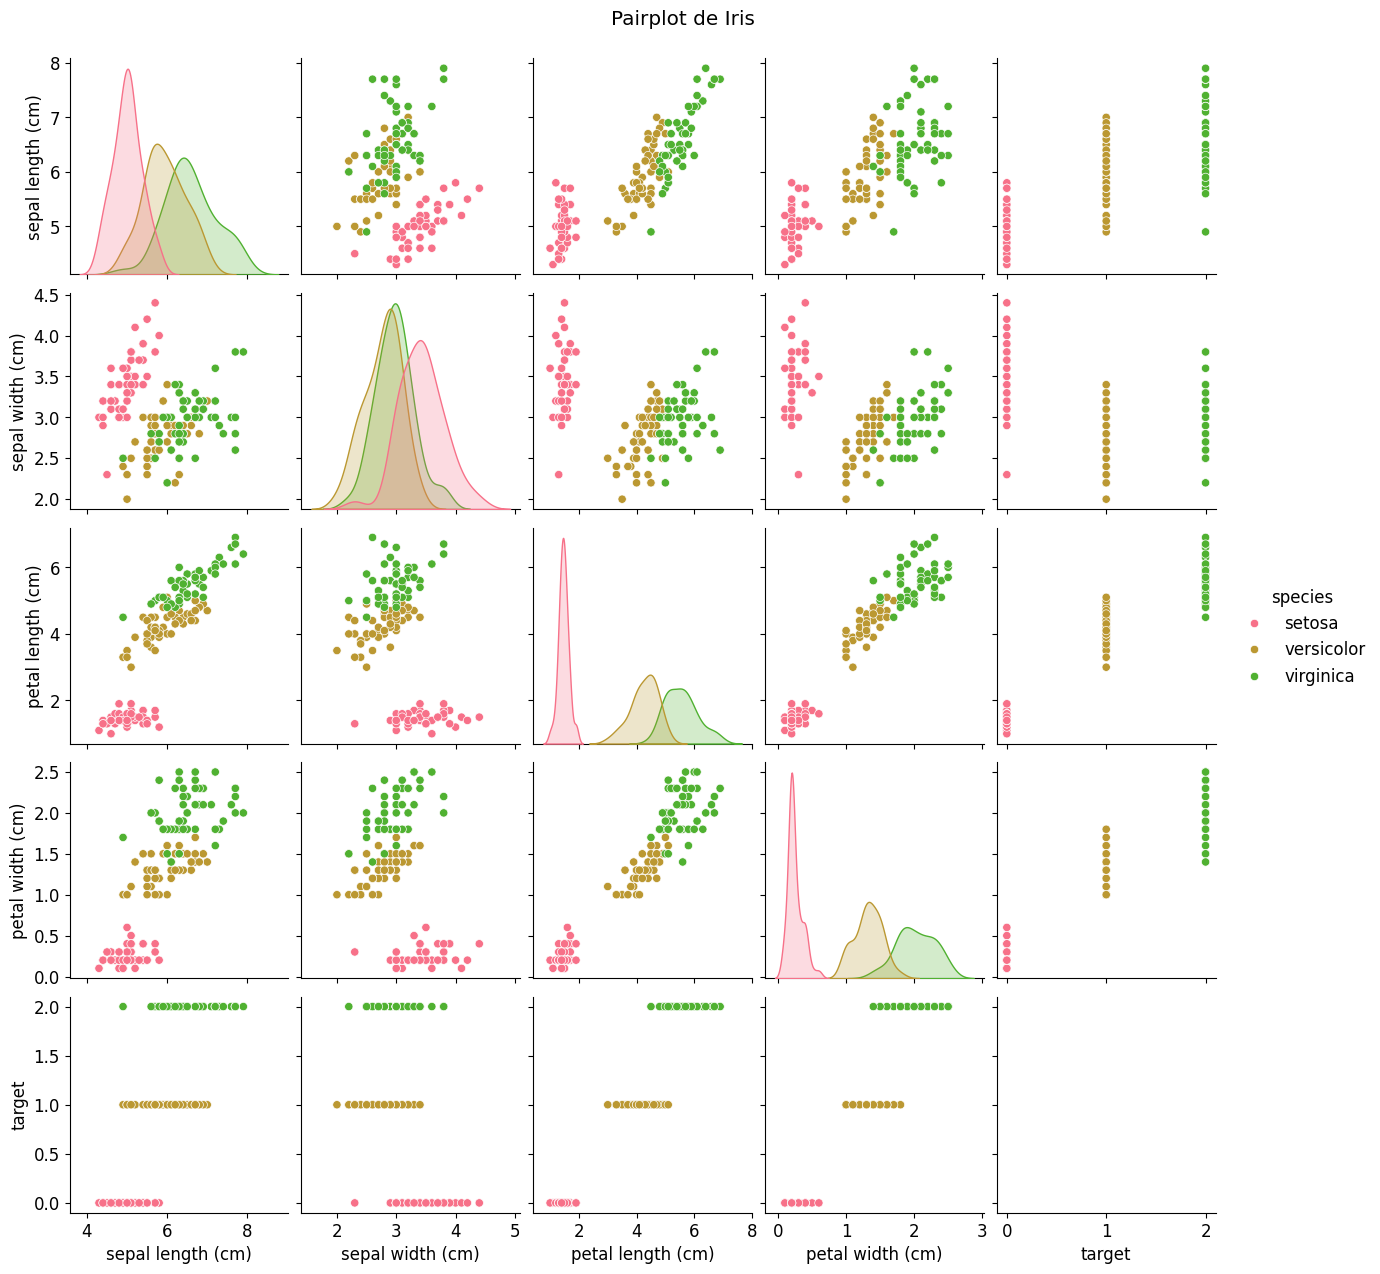

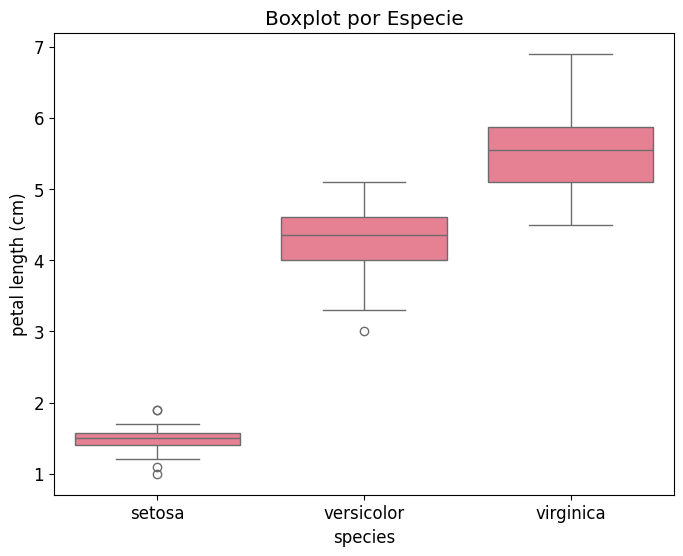

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Cargar el dataset Iris y crear el DataFrame completo
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Agregar la columna 'target' (numérica: 0,1,2) y 'species' (nombres de especies para mejor visualización)
df['target'] = iris.target
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Mostrar las primeras filas para verificar (opcional)
print(df.head())
print("\nColumnas:", df.columns.tolist())

# Pairplot (matriz de scatterplots) - Usando 'species' para colores por especie
plt.figure(figsize=(12, 10))  # Tamaño más grande para mejor visualización
sns.pairplot(df, hue='species')  # Cambié a 'species' para etiquetas legibles
plt.suptitle('Pairplot de Iris', y=1.02)
plt.show()

# Boxplot - Usando 'species' en el eje x para claridad
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='petal length (cm)', data=df)
plt.title('Boxplot por Especie')
plt.show()

## Seaborn: Visuales Estadísticos
Pairplot muestra correlaciones; boxplots, outliers.

In [ ]:
# Scatter interactivo
fig = px.scatter(df, x='sepal width (cm)', y='sepal length (cm)', color='target',
                 title='Scatter Interactivo Iris')
fig.show()

## Bonus: Plotly Interactivo
Haz zoom y hover para explorar datos dinámicamente.

In [ ]:
from getpass import getpass
from google.colab import drive
from google.colab import auth
import subprocess  # Ayudante para sustituir el token en Git

# Pide el token de forma segura (pégalo aquí – no se ve)
token = getpass("Pega tu token de GitHub aquí (no se verá): ")

# Conecta Drive y auth
drive.mount('/content/drive', force_remount=True)
auth.authenticate_user()

!git config --global user.email "boris.tigre@uees.edu.ec"
!git config --global user.name "Boris Tigre"

# Limpieza y clon
!rm -rf /content/UEES-IA-Semana1-TigreBoris
!git clone https://github.com/boristigre-uees/UEES-IA-Semana1-TigreBoris.git /content/UEES-IA-Semana1-TigreBoris
%cd /content/UEES-IA-Semana1-TigreBoris

# Carpetas
!mkdir -p ./02_Laboratorio/notebooks/

# Copia desde Drive
!cp "/content/drive/MyDrive/Colab Notebooks/02_Visualizacion_Datos.ipynb" ./02_Laboratorio/notebooks/

# Commit
!git add .
!git commit -m "Añadir notebook de fundamentos"

# TRUCO: Sustituye el token correctamente en el comando de Git (sin "{token}")
subprocess.run(["git", "remote", "set-url", "origin", f"https://{token}@github.com/boristigre-uees/UEES-IA-Semana1-TigreBoris.git"])

# Push (ahora con el token sustituido, no falla)
!git push origin main

print("¡Subido! Ve a github.com/boristigre-uees/UEES-IA-Semana1-TigreBoris para ver el notebook.")


Pega tu token de GitHub aquí (no se verá): ··········


In [ ]:
from google.colab import drive

# Conecta Drive (para encontrar el notebook)
drive.mount('/content/drive', force_remount=True)

# Asegúrate de estar en el repo (carpetas ya existen)
%cd /content/UEES-IA-Semana1-TigreBoris

# Función para guardar automáticamente en GitHub (corregida para Drive)
def save_to_github(notebook_name, commit_message="Actualizar notebook"):
    """
    Guarda el notebook actual en GitHub
    """
    # Copia DESDE DRIVE (el lugar correcto, con f-string para sustituir el nombre)
    !cp "/content/drive/MyDrive/Colab Notebooks/{notebook_name}" ./02_Laboratorio/notebooks/
    !git add .
    !git commit -m "{commit_message}"
    !git push origin main
    print(f" {notebook_name} guardado en GitHub")

# Usar al final de cada sesión de trabajo
save_to_github("02_Visualizacion_Datos.ipynb", "Completar ejercicios de NumPy y Pandas")